In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from datetime import date
from datetime import timedelta
from scipy import stats
import math
import seaborn as sns


In [2]:
TOP_DIR = r'/Users/bichama1/Documents/homework/stats'
#TOP_DIR = r'C:\Users\changc2\Documents\School\Statistical Methods for CS\data_challenge'
GRAIN_IMPORTS_IN_DIR = r'grain_exports'
SOYBEAN_PRICE_IN_DIR = r'global_soybean_prices'

In [3]:
grain_exports_csvs = glob.glob(os.path.join(TOP_DIR, GRAIN_IMPORTS_IN_DIR, '*.csv'))
new_orleans_prices_csv = os.path.join(TOP_DIR, SOYBEAN_PRICE_IN_DIR, 'NO_Port_Soybean_Prices.csv')
paranagua_prices_csv = os.path.join(TOP_DIR, SOYBEAN_PRICE_IN_DIR, 'PR_Port_Soybean_Prices.csv')
soybean_price_csv = os.path.join(TOP_DIR, SOYBEAN_PRICE_IN_DIR, 'PSOYBUSDM.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (44,49,55,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (12,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (12,44,55,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/us

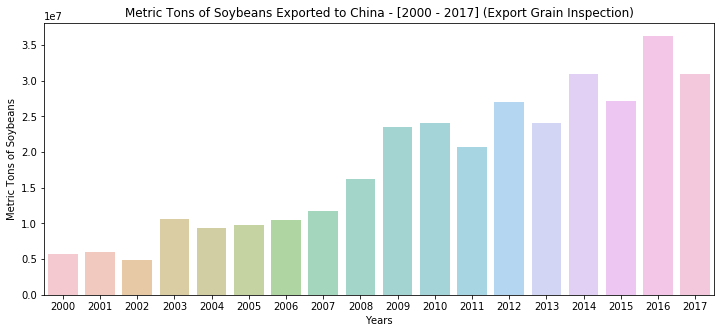

In [4]:
destination = 'CHINA MAIN'
grain = 'SOYBEANS'
exports_dataset = {}
for export_csv in grain_exports_csvs:
    year = int(os.path.basename(export_csv).replace('CY','').replace('.csv',''))
    data = pd.read_csv(export_csv)
    data = data[data['Grain'] == grain]
    data = data[data['Destination'] == destination]
    exports_dataset[year] = data
    
total_exports = []
years = sorted(exports_dataset.keys())
for year in years:
    total_exports.append(exports_dataset[year]['Metric Ton'].sum())

y_pos = np.arange(len(years))
plt.figure(figsize=(12,5))
sns.barplot(y_pos, total_exports, alpha=.5)
plt.xticks(y_pos, years)
plt.ylabel('Metric Tons of Soybeans')
plt.title('Metric Tons of Soybeans Exported to China - [2000 - 2017] (Export Grain Inspection)')
plt.xlabel('Years')
plt.show()

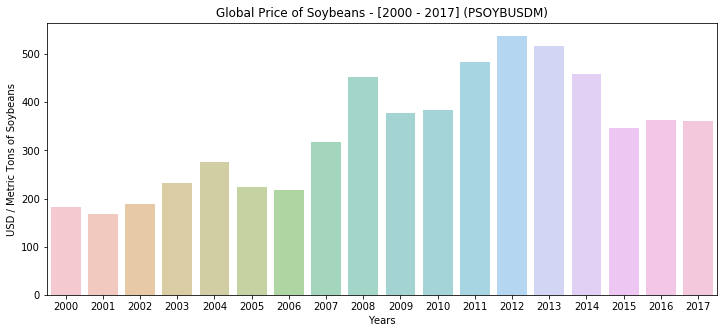

In [5]:
prices_dataset = pd.read_csv(soybean_price_csv)
prices_dataset['DATE'] = prices_dataset['DATE'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').date())

average_prices = []

for year in years:
    begin_date = date(year, 1, 1)
    end_date = date(year+1, 1, 1)
    prices_for_year = prices_dataset[(prices_dataset['DATE'] >= begin_date) & (prices_dataset['DATE'] < end_date)]
    average_price_for_year = prices_for_year['PSOYBUSDM'].mean()
    average_prices.append(average_price_for_year)
    

y_pos = np.arange(len(years))
plt.figure(figsize=(12,5))
sns.barplot(y_pos, average_prices, alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('USD / Metric Tons of Soybeans')
plt.title('Global Price of Soybeans - [2000 - 2017] (PSOYBUSDM)')
plt.xlabel('Years')
plt.show()

In [6]:
no_prices_dataset = pd.read_csv(new_orleans_prices_csv)
no_prices_dataset['DATE'] = no_prices_dataset['DATE'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').date())

pr_prices_dataset = pd.read_csv(paranagua_prices_csv)
pr_prices_dataset['DATE'] = pr_prices_dataset['DATE'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y').date())

years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
BUSHELS_PER_TON = 36.74

average_price_for_pr_month = []
average_price_for_no_month = []

average_price_pr_year = []
average_price_no_year = []
min_price_pr_year = []
min_price_no_year = []



dates = []
for year in years:
    
    for month in months:
        begin_date = date(year, month, 1)
        if month == 12:
            end_date = date(year+1, 1, 1)
        else:
            end_date = date(year, month+1, 1)
        price_for_month_pr = pr_prices_dataset[(pr_prices_dataset['DATE'] >= begin_date) & (pr_prices_dataset['DATE'] < end_date)]
        average_price_for_month_pr = price_for_month_pr['PRICE_BUSHEL'].mean()*BUSHELS_PER_TON
        average_price_for_pr_month.append(average_price_for_month_pr)
        
        price_for_month_no = no_prices_dataset[(no_prices_dataset['DATE'] >= begin_date) & (no_prices_dataset['DATE'] < end_date)]
        average_price_for_month_no = price_for_month_no['PRICE'].mean()*BUSHELS_PER_TON
        average_price_for_no_month.append(average_price_for_month_no)
        
        dates.append(begin_date)
    
    year_begin = date(year, 1, 1)
    year_end = date(year+1, 1, 1)
    price_for_year_pr = pr_prices_dataset[(pr_prices_dataset['DATE'] >= year_begin) & (pr_prices_dataset['DATE'] < year_end)]
    price_for_year_no = no_prices_dataset[(no_prices_dataset['DATE'] >= year_begin) & (no_prices_dataset['DATE'] < year_end)]
    average_price_for_year_pr = price_for_year_pr['PRICE_BUSHEL'].mean()*BUSHELS_PER_TON
    average_price_for_year_no = price_for_year_no['PRICE'].mean()*BUSHELS_PER_TON
    average_price_pr_year.append(average_price_for_year_pr)
    average_price_no_year.append(average_price_for_year_no)
    
    min_price_for_year_pr = price_for_year_pr['PRICE_BUSHEL'].min()*BUSHELS_PER_TON
    min_price_for_year_no = price_for_year_no['PRICE'].min()*BUSHELS_PER_TON
    min_price_pr_year.append(min_price_for_year_pr)
    min_price_no_year.append(min_price_for_year_no)
    
df = pd.DataFrame({'PR':average_price_for_pr_month, 'NO': average_price_for_no_month}, index = pd.Series(dates))
df = df[(df['NO'].notnull()) & (df['PR'].notnull())]

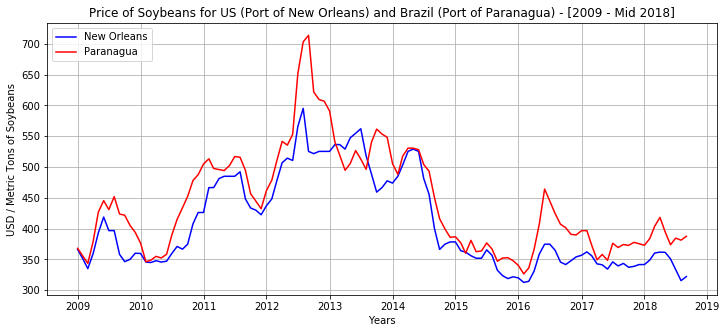

In [7]:
plt.figure(figsize=(12,5))

ax1 = df.NO.plot(color='blue', grid=True, label='New Orleans')
ax2 = df.PR.plot(color='red', grid=True, secondary_y=False, label='Paranagua')

h1, l1 = ax1.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)
plt.xlabel('Years')
plt.ylabel('USD / Metric Tons of Soybeans')
plt.title('Price of Soybeans for US (Port of New Orleans) and Brazil (Port of Paranagua) - [2009 - Mid 2018]')
plt.show()


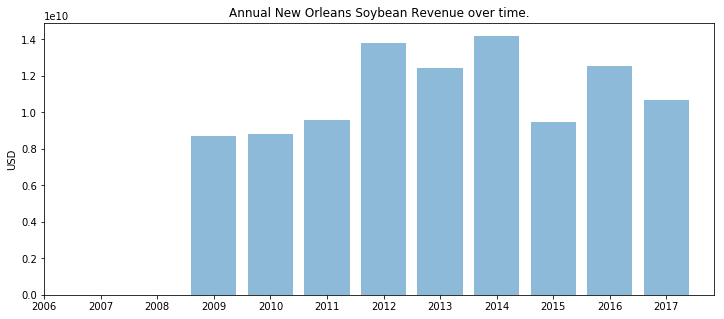

In [8]:
total_exports_no = []
for year in years[:-1]:
    total_exports_no.append(exports_dataset[year]['Metric Ton'].sum())


annual_sales = [price*tons for price,tons in zip(average_price_no_year, total_exports_no)]
y_pos = np.arange(len(years[:-1]))
plt.figure(figsize=(12,5))
plt.bar(y_pos, annual_sales, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('USD')
plt.title('Annual New Orleans Soybean Revenue over time.')
plt.show()

1798827.4891640868 -3594632250.8194017 0.9591120062499655 3.4545442900561017e-10 132705.13577972003


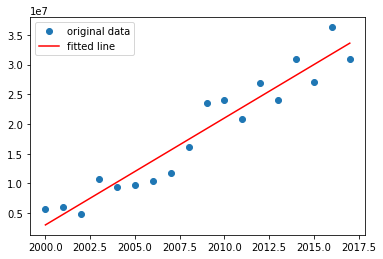

132705.13577972003


In [25]:
years = np.array(sorted(exports_dataset.keys()))
total_exports = np.array(total_exports)
slope, intercept, r_value, p_value, std_err = stats.linregress(years, total_exports)
print(slope, intercept, r_value, p_value, std_err)
plt.plot(years, total_exports, 'o', label='original data')
plt.plot(years, intercept + slope*years, 'r', label='fitted line')
plt.legend()
plt.show()
print(std_err)

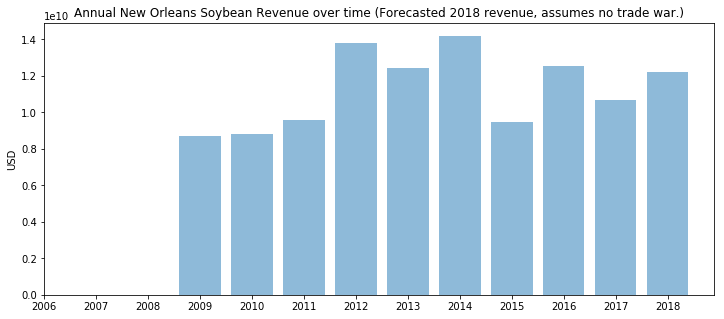

[nan, nan, nan, 369.32885000000005, 366.45088333333337, 460.1685, 512.8291666666668, 516.8093333333333, 458.2396500000001, 348.6319833333333, 345.0498333333333, 345.01921666666664, 345.01921666666664]


In [10]:
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
estimated_2018_export_tons = slope*2018.0+intercept

total_exports_no_with_2018 = total_exports_no + [estimated_2018_export_tons]

average_price_no_year_assume_2017 = average_price_no_year[:-1]
average_price_no_year_assume_2017.append(average_price_no_year_assume_2017[-1])

annual_sales_with_2018_assume_2017 = [price*tons for price,tons in zip(average_price_no_year_assume_2017, total_exports_no_with_2018)]

y_pos = np.arange(len(years))
plt.figure(figsize=(12,5))
plt.bar(y_pos, annual_sales_with_2018_assume_2017, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('USD')
plt.title('Annual New Orleans Soybean Revenue over time (Forecasted 2018 revenue, assumes no trade war.)')
plt.show()

print(average_price_no_year_assume_2017)

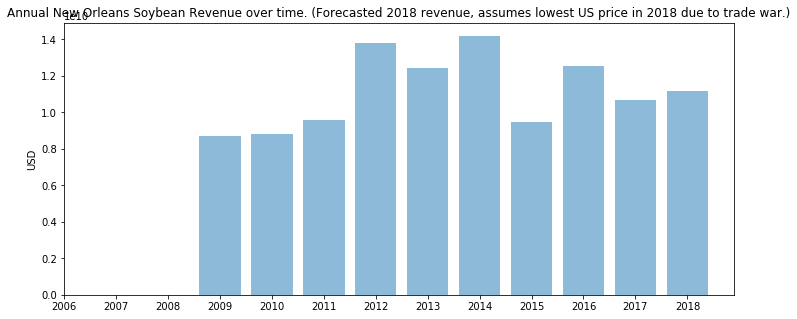

[nan, nan, nan, 369.32885000000005, 366.45088333333337, 460.1685, 512.8291666666668, 516.8093333333333, 458.2396500000001, 348.6319833333333, 345.0498333333333, 345.01921666666664, 345.01921666666664]


In [11]:
average_price_no_year_assume_worst_2018 = average_price_no_year[:-1]

min_2018_price = min_price_no_year[-1]

average_price_no_year_assume_worst_2018.append(min_2018_price)

annual_sales_with_2018_assume_worst_2018 = [price*tons for price,tons in zip(average_price_no_year_assume_worst_2018, total_exports_no_with_2018)]

y_pos = np.arange(len(years))
plt.figure(figsize=(12,5))
plt.bar(y_pos, annual_sales_with_2018_assume_worst_2018, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('USD')
plt.title('Annual New Orleans Soybean Revenue over time. (Forecasted 2018 revenue, assumes lowest US price in 2018 due to trade war.)')
plt.show()

print(average_price_no_year_assume_2017)

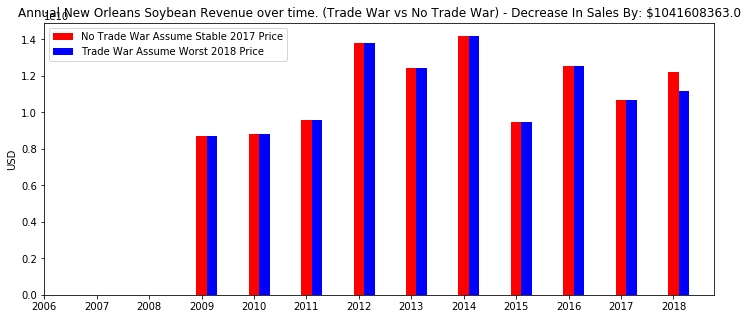

In [12]:
delta = annual_sales_with_2018_assume_2017[-1] - annual_sales_with_2018_assume_worst_2018[-1]
plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.bar(y_pos, annual_sales_with_2018_assume_2017,width=0.2,color='r',align='center', label='No Trade War Assume Stable 2017 Price')
ax.bar(y_pos+0.2, annual_sales_with_2018_assume_worst_2018,width=0.2,color='b',align='center', label='Trade War Assume Worst 2018 Price')
plt.xticks(y_pos, years)
plt.ylabel('USD')
plt.title('Annual New Orleans Soybean Revenue over time. (Trade War vs No Trade War) - Decrease In Sales By: $' + str(round(delta)))
h1, l1 = ax.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)
plt.show()


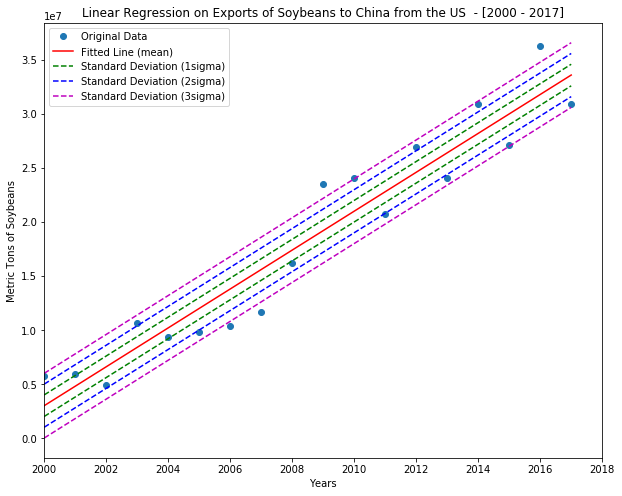

In [13]:
years = np.array(sorted(exports_dataset.keys()))
errors = []
for i in range(len(years)):
    error = total_exports[i] - (slope*years[i]+intercept)
    errors.append(abs(error))

stddev_1s = np.std(errors)
stddev_2s = 2*np.std(errors)
stddev_3s = 3*np.std(errors)

plt.figure(figsize=(10,8))

plt.plot(years, total_exports, 'o', label='Original Data')

plt.plot(years, intercept + slope*years, 'r', label='Fitted Line (mean)')

plt.plot(years, (intercept+stddev_1s) + slope*years, 'g--', label='Standard Deviation (1sigma)')
plt.plot(years, (intercept-stddev_1s) + slope*years, 'g--')

plt.plot(years, (intercept+stddev_2s) + slope*years, 'b--', label='Standard Deviation (2sigma)')
plt.plot(years, (intercept-stddev_2s) + slope*years, 'b--')

plt.plot(years, (intercept+stddev_3s) + slope*years, 'm--', label='Standard Deviation (3sigma)')
plt.plot(years, (intercept-stddev_3s) + slope*years, 'm--')

plt.xlabel('Years')
plt.ylabel('Metric Tons of Soybeans')
plt.title('Linear Regression on Exports of Soybeans to China from the US  - [2000 - 2017]')

plt.xlim((2000, 2018))

plt.legend()
plt.show()

In [14]:
sigma1_max = (intercept+stddev_1s) + slope*2018
sigma1_min = (intercept-stddev_1s) + slope*2018

sigma2_max = (intercept+stddev_2s) + slope*2018
sigma2_min = (intercept-stddev_2s) + slope*2018

sigma3_max = (intercept+stddev_3s) + slope*2018
sigma3_min = (intercept-stddev_3s) + slope*2018

total_exports_no_sigma1max = total_exports_no + [sigma1_max]
total_exports_no_sigma1min = total_exports_no + [sigma1_min]

total_exports_no_sigma2max = total_exports_no + [sigma2_max]
total_exports_no_sigma2min = total_exports_no + [sigma2_min]

total_exports_no_sigma3max = total_exports_no + [sigma3_max]
total_exports_no_sigma3min = total_exports_no + [sigma3_min]

annual_sales_with_2018_sigma1_max = [price*tons for price,tons in zip(average_price_no_year_assume_2017, total_exports_no_sigma1max)]
annual_sales_with_2018_sigma1_min = [price*tons for price,tons in zip(average_price_no_year_assume_2017, total_exports_no_sigma1min)]

annual_sales_with_2018_sigma2_max = [price*tons for price,tons in zip(average_price_no_year_assume_2017, total_exports_no_sigma2max)]
annual_sales_with_2018_sigma2_min = [price*tons for price,tons in zip(average_price_no_year_assume_2017, total_exports_no_sigma2min)]

annual_sales_with_2018_sigma3_max = [price*tons for price,tons in zip(average_price_no_year_assume_2017, total_exports_no_sigma3max)]
annual_sales_with_2018_sigma3_min = [price*tons for price,tons in zip(average_price_no_year_assume_2017, total_exports_no_sigma3min)]


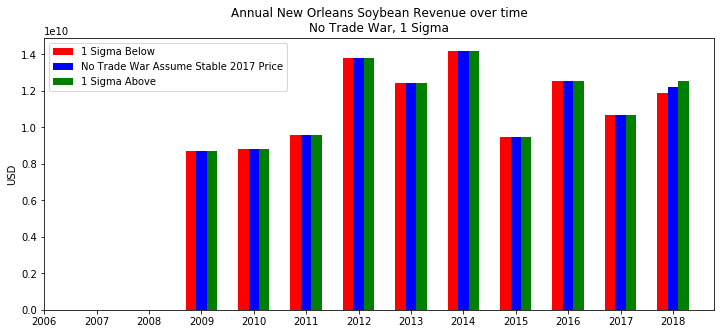

In [15]:
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.bar(y_pos-0.2, annual_sales_with_2018_sigma1_min,width=0.2,color='r',align='center', label='1 Sigma Below')
ax.bar(y_pos, annual_sales_with_2018_assume_2017,width=0.2,color='b',align='center', label='No Trade War Assume Stable 2017 Price')
ax.bar(y_pos+0.2, annual_sales_with_2018_sigma1_max,width=0.2,color='g',align='center', label='1 Sigma Above')
plt.xticks(y_pos, years)
plt.ylabel('USD')
plt.title('Annual New Orleans Soybean Revenue over time\nNo Trade War, 1 Sigma')
h1, l1 = ax.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)

plt.show()

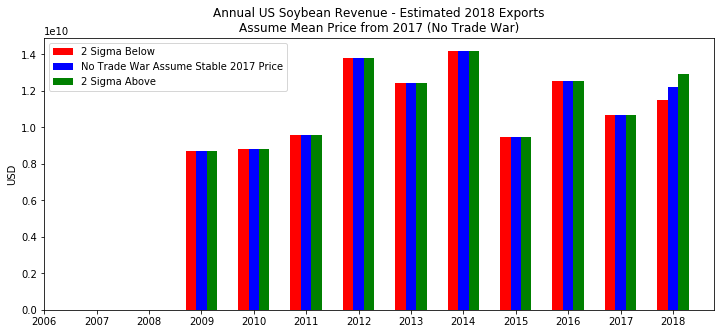

In [16]:
plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.bar(y_pos-0.2, annual_sales_with_2018_sigma2_min,width=0.2,color='r',align='center', label='2 Sigma Below')
ax.bar(y_pos, annual_sales_with_2018_assume_2017,width=0.2,color='b',align='center', label='No Trade War Assume Stable 2017 Price')
ax.bar(y_pos+0.2, annual_sales_with_2018_sigma2_max,width=0.2,color='g',align='center', label='2 Sigma Above')
plt.xticks(y_pos, years)
plt.ylabel('USD')
plt.title('Annual US Soybean Revenue - Estimated 2018 Exports\nAssume Mean Price from 2017 (No Trade War)')
h1, l1 = ax.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)

plt.show()

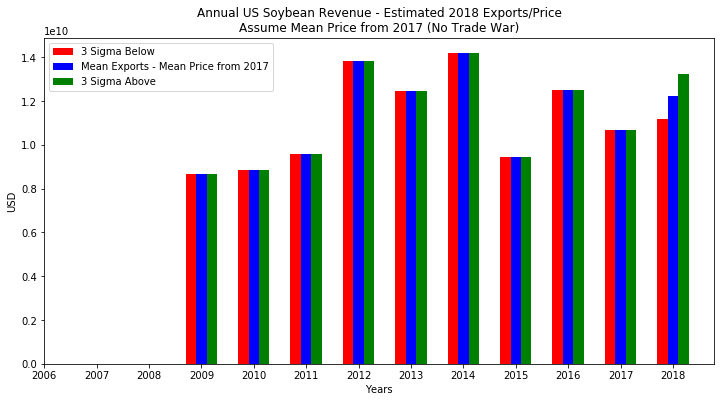

In [17]:
plt.figure(figsize=(12,6))
ax = plt.subplot(111)
ax.bar(y_pos-0.2, annual_sales_with_2018_sigma3_min,width=0.2,color='r',align='center', label='3 Sigma Below')
ax.bar(y_pos, annual_sales_with_2018_assume_2017,width=0.2,color='b',align='center', label='Mean Exports - Mean Price from 2017')
ax.bar(y_pos+0.2, annual_sales_with_2018_sigma3_max,width=0.2,color='g',align='center', label='3 Sigma Above')
plt.xticks(y_pos, years)
plt.ylabel('USD')
plt.xlabel('Years')
plt.title('Annual US Soybean Revenue - Estimated 2018 Exports/Price\nAssume Mean Price from 2017 (No Trade War)')
h1, l1 = ax.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)

plt.show()

In [18]:
sigma1_max = (intercept+stddev_1s) + slope*2018
sigma1_min = (intercept-stddev_1s) + slope*2018

sigma2_max = (intercept+stddev_2s) + slope*2018
sigma2_min = (intercept-stddev_2s) + slope*2018

sigma3_max = (intercept+stddev_3s) + slope*2018
sigma3_min = (intercept-stddev_3s) + slope*2018

total_exports_no_sigma1max = total_exports_no + [sigma1_max]
total_exports_no_sigma1min = total_exports_no + [sigma1_min]

total_exports_no_sigma2max = total_exports_no + [sigma2_max]
total_exports_no_sigma2min = total_exports_no + [sigma2_min]

total_exports_no_sigma3max = total_exports_no + [sigma3_max]
total_exports_no_sigma3min = total_exports_no + [sigma3_min]

annual_sales_with_2018_sigma1_max = [price*tons for price,tons in zip(average_price_no_year_assume_worst_2018, total_exports_no_sigma1max)]
annual_sales_with_2018_sigma1_min = [price*tons for price,tons in zip(average_price_no_year_assume_worst_2018, total_exports_no_sigma1min)]

annual_sales_with_2018_sigma2_max = [price*tons for price,tons in zip(average_price_no_year_assume_worst_2018, total_exports_no_sigma2max)]
annual_sales_with_2018_sigma2_min = [price*tons for price,tons in zip(average_price_no_year_assume_worst_2018, total_exports_no_sigma2min)]

annual_sales_with_2018_sigma3_max = [price*tons for price,tons in zip(average_price_no_year_assume_worst_2018, total_exports_no_sigma3max)]
annual_sales_with_2018_sigma3_min = [price*tons for price,tons in zip(average_price_no_year_assume_worst_2018, total_exports_no_sigma3min)]


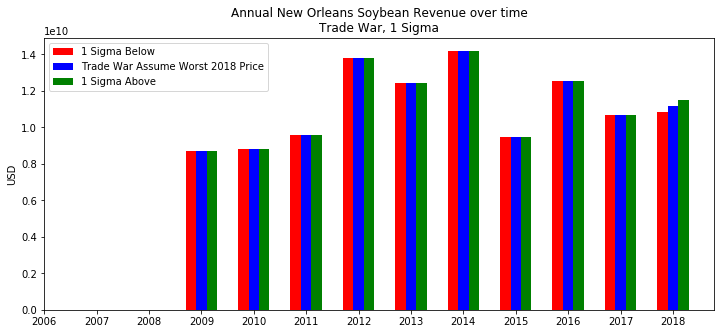

In [19]:
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.bar(y_pos-0.2, annual_sales_with_2018_sigma1_min,width=0.2,color='r',align='center', label='1 Sigma Below')
ax.bar(y_pos, annual_sales_with_2018_assume_worst_2018,width=0.2,color='b',align='center', label='Trade War Assume Worst 2018 Price')
ax.bar(y_pos+0.2, annual_sales_with_2018_sigma1_max,width=0.2,color='g',align='center', label='1 Sigma Above')
plt.xticks(y_pos, years)
plt.ylabel('USD')
plt.title('Annual New Orleans Soybean Revenue over time\nTrade War, 1 Sigma')
h1, l1 = ax.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)

plt.show()

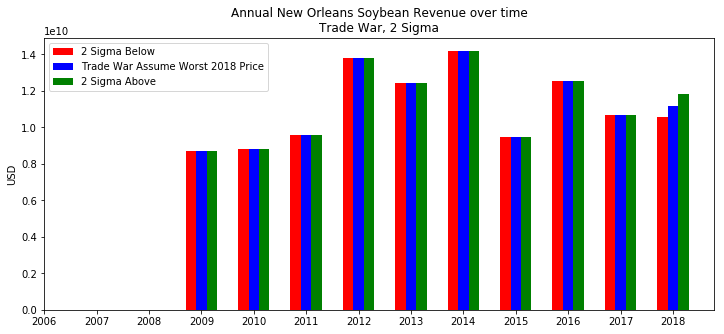

In [20]:
plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.bar(y_pos-0.2, annual_sales_with_2018_sigma2_min,width=0.2,color='r',align='center', label='2 Sigma Below')
ax.bar(y_pos, annual_sales_with_2018_assume_worst_2018,width=0.2,color='b',align='center', label='Trade War Assume Worst 2018 Price')
ax.bar(y_pos+0.2, annual_sales_with_2018_sigma2_max,width=0.2,color='g',align='center', label='2 Sigma Above')
plt.xticks(y_pos, years)
plt.ylabel('USD')
plt.title('Annual New Orleans Soybean Revenue over time\nTrade War, 2 Sigma')
h1, l1 = ax.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)

plt.show()

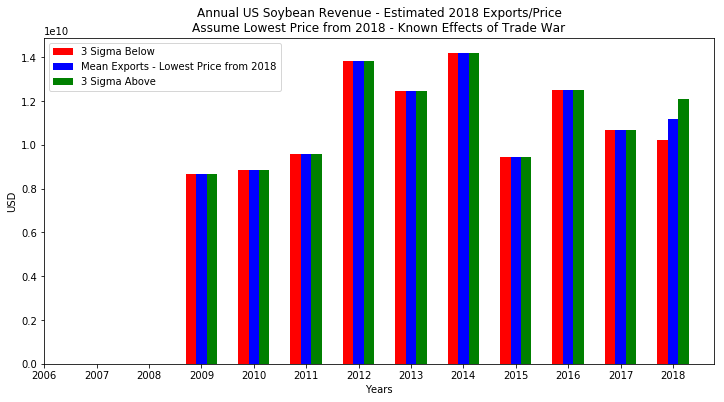

In [21]:
plt.figure(figsize=(12,6))
ax = plt.subplot(111)
ax.bar(y_pos-0.2, annual_sales_with_2018_sigma3_min,width=0.2,color='r',align='center', label='3 Sigma Below')
ax.bar(y_pos, annual_sales_with_2018_assume_worst_2018,width=0.2,color='b',align='center', label='Mean Exports - Lowest Price from 2018')
ax.bar(y_pos+0.2, annual_sales_with_2018_sigma3_max,width=0.2,color='g',align='center', label='3 Sigma Above')
plt.xticks(y_pos, years)
plt.ylabel('USD')
plt.xlabel('Years')
plt.title('Annual US Soybean Revenue - Estimated 2018 Exports/Price\nAssume Lowest Price from 2018 - Known Effects of Trade War')
h1, l1 = ax.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)

plt.show()

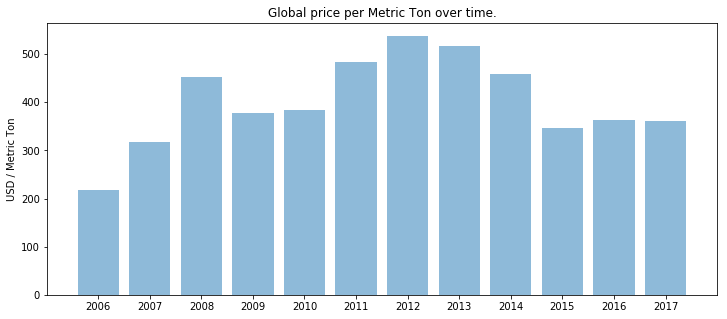

In [22]:
prices_dataset = pd.read_csv(soybean_price_csv)
prices_dataset['DATE'] = prices_dataset['DATE'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').date())

average_prices = []
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

for year in years:
    begin_date = date(year, 1, 1)
    end_date = date(year+1, 1, 1)
    prices_for_year = prices_dataset[(prices_dataset['DATE'] >= begin_date) & (prices_dataset['DATE'] < end_date)]
    average_price_for_year = prices_for_year['PSOYBUSDM'].mean()
    average_prices.append(average_price_for_year)
    
y_pos = np.arange(len(years))
plt.figure(figsize=(12,5))
plt.bar(y_pos, average_prices, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('USD / Metric Ton')
plt.title('Global price per Metric Ton over time.')
plt.show()

In [23]:
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
total_exports_sub = []
for year in years:
    total_exports_sub.append(exports_dataset[year]['Metric Ton'].sum())

df_sub = pd.DataFrame({'GlobalPrices':average_prices, 'TonsExported':total_exports_sub})
df_sub['GlobalPrices'].corr(df_sub['TonsExported'])

0.34936666730893423